In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
%matplotlib inline

In [2]:
telco_raw = pd.read_csv('//home//renato//ENV//Tecnologia//Datacamp//Data//telco.csv')
telco_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Print the data types of telco_raw dataset
telco_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Print the number of unique values in each telco_raw column
telco_raw.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Separate numerical and categorical columns

In the last exercise, you have explored the dataset characteristics and are ready to do some data pre-processing. You will now separate categorical and numerical variables from the telco_raw DataFrame with a customized categorical vs. numerical unique value count threshold. The pandas module has been loaded for you as pd.

The raw telecom churn dataset telco_raw has been loaded for you as a pandas DataFrame. You can familiarize with the dataset by exploring it in the console.

In [94]:
# Store customerID and Churn column names
custid = ['customerID']
target = ['Churn']

# Store categorical column names
categorical = telco_raw.nunique()[telco_raw.nunique() < 5].keys().tolist()

# Remove target from the list of categorical variables
categorical.remove(target[0])

# Store numerical column names
numerical = [x for x in telco_raw.columns if x not in custid + target + categorical]

### Encode categorical and scale numerical variables

In this final step, you will perform one-hot encoding on the categorical variables and then scale the numerical columns. The pandas library has been loaded for you as pd, as well as the StandardScaler module from the sklearn.preprocessing module.

The raw telecom churn dataset telco_raw has been loaded for you as a pandas DataFrame, as well as the lists custid, target, categorical, and numerical with column names you have created in the previous exercise. You can familiarize yourself with the dataset by exploring it in the console.

In [6]:
# Perform one-hot encoding to categorical variables 
telco_raw = pd.get_dummies(data = telco_raw, columns = categorical, drop_first=True)

In [7]:
# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on numerical columns
scaled_numerical = scaler.fit_transform(telco_raw[numerical[:2]])

# Build a DataFrame from scaled_numerical
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical[:2])

# Supervised Learning 

### Split data to training and testing

You are now ready to build an end-to-end machine learning model by following a few simple steps! You will explore modeling nuances in much more detail in the next chapters, but for now you will practice and understand the key steps.

The independent features have been loaded for you as a pandas DataFrame named X, and the dependent values as a pandas Series named Y.

Also, the train_test_split function has been loaded from the sklearn library. You will now create training and testing datasets, and then make sure the data was correctly split.

In [8]:
telco_raw.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [9]:
telco_raw.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


.drop(categorical, axis=1)

In [10]:
X = telco_raw
Y = telco_raw['Churn']

In [11]:
# Split X and Y into training and testing datasets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25)

# Ensure training dataset has only 75% of original X data
print(train_X.shape[0] / X.shape[0])

# Ensure testing dataset has only 25% of original X data
print(test_X.shape[0] / X.shape[0])

0.7499645037626012
0.25003549623739885


### Fit a decision tree

Now, you will take a stab at building a decision tree model. The decision tree is a list of machine-learned if-else rules that decide in the telecom churn case, whether customers will churn or not. Here's an example decision tree graph built on the famous Titanic survival dataset.

The train_X, test_X, train_Y, test_Y from the previous exercise have been loaded for you. Also, the tree module and the accuracy_score function have been loaded from the sklearn library. You will now build your model and check its performance on unseen data.

In [19]:
# Initialize the model with max_depth set at 5
mytree = tree.DecisionTreeClassifier(max_depth = 5)

# Fit the model on the training data
treemodel = mytree.fit(train_X, train_Y)

# Predict values on the testing data
pred_Y = treemodel.predict(test_X)

# Measure model performance on testing data
accuracy_score(test_Y, pred_Y)

ValueError: could not convert string to float: '6959-GQEGV'

# Churn prediction and drivers - Chapter 2

### Explore churn rate and split data

Building on top of the overview you saw in Chapter 1, in this lesson, you're going to dig deeper into the data preparation needed for using machine learning to perform churn prediction. You will explore the churn distribution and split the data into training and testing before you proceed to modeling. In this step you get to understand how the churn rate is distributed, and pre-process the data so you can build a model on the training set, and measure its performance on unused testing data.

The telecom dataset has been loaded as a pandas DataFrame named telcom. The target variable column is called Churn.

In [23]:
telcom = pd.read_csv('//home//renato//ENV//Tecnologia//Datacamp//Data//telco.csv')

In [25]:
# Print the unique Churn values
print(set(telcom['Churn']))

{'No', 'Yes'}


In [26]:
# Calculate the ratio size of each churn group
telcom.groupby(['Churn']).size() / telcom.shape[0] * 100


Churn
No     73.463013
Yes    26.536987
dtype: float64

In [28]:
# Import the function for splitting data to train and test
from sklearn.model_selection import train_test_split

# Split the data into train and test
train, test = train_test_split(telcom, test_size = .25)


### Separate features and target variable

Now that you have split the data intro training and testing, it's time to perform he final step before fitting the model which is to separate the features and target variables into different datasets. You will use the list of columns names that have been loaded for you.

The main dataset is loaded as telcom, and split into training and testing datasets which are loaded as pandas DataFrames into train and test respectively. The target and custid lists contain the names of the target variable and the customer ID respectively. You will have to create the cols list with the names of the remaining columns. Feel free to explore the datasets in the console.

In [36]:
# Store column names from `telcom` excluding target variable and customer ID
cols = [col for col in telcom.columns if col not in custid + target]

# Extract training features
train_X = train[cols]

# Extract training target
train_Y = train[target]

# Extract testing features
test_X = test[cols]

# Extract testing target
test_Y = test[target]

In [37]:
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

### Fit logistic regression model

Logistic regression is a simple yet very powerful classification model that is used in many different use cases. You will now fit a logistic regression on the training part of the telecom churn dataset, and then predict labels on the unseen test set. Afterwards, you will calculate the accuracy of your model predictions.

The accuracy_score function has been imported, and a LogisticRegression instance from sklearn has been initialized as logreg. The training and testing datasets that you've built previously have been loaded as train_X and test_X for features, and train_Y and test_Y for target variables.

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [49]:
# Fit logistic regression on training data
logreg.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = logreg.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))

/home/renato/ENV/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


NameError: name 'accuracy_score' is not defined

### Fit logistic regression with L1 regularization

You will now run a logistic regression model on scaled data with L1 regularization to perform feature selection alongside model building. In the video exercise you have seen how the different C values have an effect on your accuracy score and the number of non-zero features. In this exercise, you will set the C value to 0.025.

The LogisticRegression and accuracy_score functions from sklearn library have been loaded for you. Also, the scaled features and target variables have been loaded as train_X, train_Y for training data, and test_X, test_Y for test data.

In [46]:
# Initialize logistic regression instance 
logreg = LogisticRegression(penalty='l1', C=0.025, solver='liblinear')

# Fit the model on training data
logreg.fit(train_X, train_Y)

# Predict churn values on test data
pred_test_Y = logreg.predict(test_X)

# Print the accuracy score on test data
print('Test accuracy:', round(accuracy_score(test_Y, pred_test_Y), 4))

NameError: name 'LogisticRegression' is not defined

### Identify optimal L1 penalty coefficient

You will now tune the C parameter for the L1 regularization to discover the one which reduces model complexity while still maintaining good model performance metrics. You will run a for loop through possible C values and build logistic regression instances on each, as well as calculate performance metrics.

A list C has been created with the possible values. The l1_metrics array has been built with 3 columns, with the first being the C values, and the next two being placeholders for non-zero coefficient counts and the recall score of the model. The scaled features and target variables have been loaded as train_X, train_Y for training, and test_X, test_Y for testing.

Both numpy and pandas are loaded as np and pd as well as the recall_score function from sklearn.

In [40]:
C = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]

# Run a for loop over the range of C list length
for index in range(0, len(C)):
  # Initialize and fit Logistic Regression with the C candidate
  logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
  logreg.fit(train_X, train_Y)
  # Predict churn on the testing data
  pred_test_Y = logreg.predict(test_X)
  # Create non-zero count and recall score columns
  l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
  l1_metrics[index,2] = recall_score(test_Y, pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['C','Non-Zero Coeffs','Recall']
print(pd.DataFrame(l1_metrics, columns=col_names))

ValueError: could not convert string to float: 'Electronic check'

### Fit decision tree model

Now you will fit a decision tree on the training set of the telecom dataset, and then predict labels on the unseen testing data, and calculate the accuracy of your model predictions. You will see the difference in the performance compared to the logistic regression.

The accuracy_score function has been imported, also the training and testing datasets that you've built previously have been loaded as train_X and test_X for features, and train_Y and test_Y for target variables.

In [ ]:
# Initialize decision trof continuous-multioutput and binary targeee classifier
mytree = tree.DecisionTreeClassifier()

# Fit the decision tree on training data
mytree.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = mytree.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy
print('Test accuracy:', round(test_accuracy, 4))

### Identify optimal tree depth

Now you will tune the max_depth parameter of the decision tree to discover the one which reduces over-fitting while still maintaining good model performance metrics. You will run a for loop through multiple max_depth parameter values and fit a decision tree for each, and then calculate performance metrics.

The list called depth_list with the parameter candidates has been loaded for you. The depth_tuning array has been built for you with 2 columns, with the first one being filled with the depth candidates, and the next one being a placeholder for the recall score. Also, the features and target variables have been loaded as train_X, train_Y for the training data, and test_X, test_Y for the test data. Both numpy and pandas libraries are loaded as np and pd respectively.

In [ ]:
# Run a for loop over the range of depth list length
for index in range(0, len(depth_list)):
  # Initialize and fit decision tree with the `max_depth` candidate
  mytree = DecisionTreeClassifier(max_depth=depth_list[index])
  mytree.fit(train_X, train_Y)
  # Predict churn on the testing data
  pred_test_Y = mytree.predict(test_X)
  # Calculate the recall score 
  depth_tuning[index,1] = recall_score(test_Y, pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['Max_Depth','Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))

### Explore logistic regression coefficients

You will now explore the coefficients of the logistic regression to understand what is driving churn to go up or down. For this exercise, you will extract the logistic regression coefficients from your fitted model, and calculate their exponent to make them more interpretable.

The fitted logistic regression instance is loaded as logreg and the scaled features are loaded as a pandas DataFrame called train_X. The numpy and pandas libraries are loaded as np and pd respectively.

In [48]:
# Combine feature names and coefficients into pandas DataFrame
feature_names = pd.DataFrame(train_X.columns, columns=['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns=['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Calculate exponent of the logistic regression coefficients
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient']!=0]

# Print the values sorted by the exponent coefficient
print(coefficients.sort_values(by=['Exp_Coefficient']))

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

### Break down decision tree rules

In this exercise you will extract the if-else rules from the decision tree and plot them to identify the main drivers of the churn.

The fitted decision tree instance is loaded as mytree and the scaled features are loaded as a pandas DataFrame called train_X. The tree module from sklearn library and the graphviz library have been already loaded for you.

Note that we've used a proprietary display_image() function instead of display(graph) to make it easier for you to view the output.

In [51]:
# Export graphviz object from the trained decision tree 
exported = tree.export_graphviz(decision_tree=mytree, 
            # Assign feature names
            out_file=None, feature_names=train_X.columns, 
            # Set precision to 1 and add class names
            precision=1, class_names=['Not churn','Churn'], filled = True)

# Call the Source function and pass the exported graphviz object
graph = graphviz.Source(exported)

# Display the decision tree
display_image("/usr/local/share/datasets/decision_tree_rules.png")

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Customer Lifetime Value (CLV) prediction

In [2]:
import datetime as dt

In [3]:
path = '//home//renato//ENV//Tecnologia//Datacamp/Data//' 
file = 'online.csv'

In [4]:
online = pd.read_csv(path+file)
online.drop(['Unnamed: 0'], axis=1, inplace= True)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [5]:
online.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [6]:
online.shape

(70864, 8)

In [7]:
online.InvoiceDate = pd.to_datetime(online['InvoiceDate'])

In [8]:
# Define a function that will parse the date
def get_day(x): 
    return dt.datetime(x.year, x.month,x.day)

# Define a function that will parse the date
def get_month(x): 
    return dt.datetime(x.year, x.month,1)

In [9]:
# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

# Group by CustomerID and select the InvoiceMonth value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

In [10]:
# Assign a minimum InvoiceMonth value to the dataset
online['CohortMonth'] = grouping.transform('min')


# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [11]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [12]:
# Get the integers for date parts from the InvoiceMonthcolumn
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceMonth')

# Get the integers for date parts from the CohortMonth columnCohortDay
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortMonth')

In [13]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [14]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [15]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

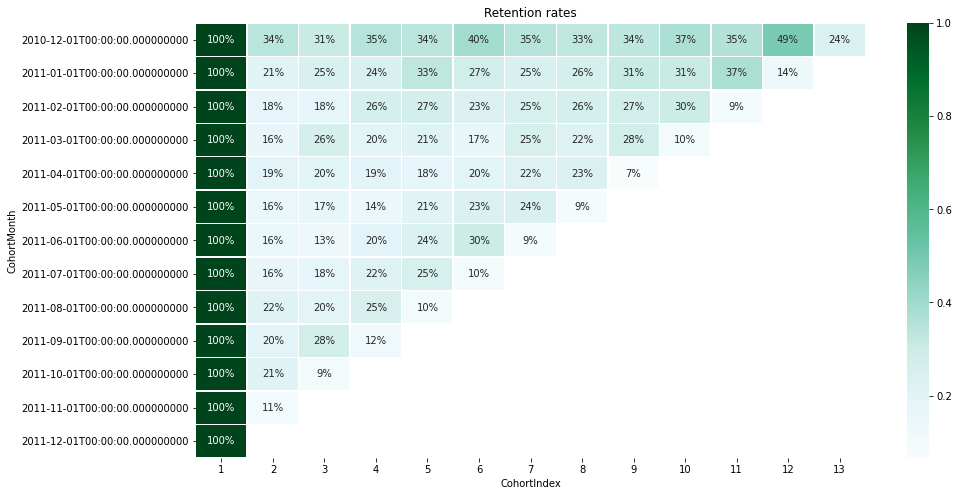

In [16]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,annot=True, fmt = '.0%', cmap = 'BuGn', linewidths=.5)
plt.show()

In [17]:
online.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'CohortMonth',
       'CohortIndex'],
      dtype='object')

In [18]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

In [19]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1,2.10
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4,17.85


### Build retention and churn tables

You have learned the main elements of the customer lifetime value calculation and certain variations of it. Now you will use use the monthly cohort activity dataset to calculate retention and churn values, which you will then explore and later use to project average customer lifetime value.

The pandas library has been loaded as pd and the cohorts_counts dataset has been imported. Feel free to explore it in the console.

In [20]:
# Extract cohort sizes from the first column of cohort_counts
cohort_sizes = cohort_counts.iloc[:,0]

# Calculate retention by dividing the counts with the cohort sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Calculate churn
churn = 1 - retention

# Print the retention table
retention.fillna("")

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,
2011-02-01,1.0,0.183544,0.18038,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.0886076,,
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.17268,0.252577,0.219072,0.275773,0.0979381,,,
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.0666667,,,,
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.24498,0.0883534,,,,,
2011-06-01,1.0,0.15942,0.125604,0.198068,0.236715,0.299517,0.0917874,,,,,,
2011-07-01,1.0,0.16185,0.179191,0.219653,0.254335,0.0982659,,,,,,,
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,,,,,,,,


### Explore retention and churn

Now that you have calculated the monthly retention and churn metrics for monthly customer cohorts, you can calculate the overall mean retention and churn rates. You will use the .mean() method twice in a row (this is called "chaining") to calculate the overall mean. You will have to exclude the first month values (first column) from this calculation as they are constant given this is the first month the customers have been active therefore their retention will be 100% and churn will be 0% for all cohorts.

The pandas and numpy libraries have been loaded as pd as np respectively. The retention and churn monthly datasets that you built in the previous exercises are also imported.

In [21]:
# Calculate the mean retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate the mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.24; Churn rate: 0.76


### Calculate basic CLV

You are now ready to calculate average customer lifetime with three different methods! In this exercise you will calculate the basic CLV which multiplies average monthly spent with the projected customer lifespan.

The pandas and numpy libraries have been loaded as pd as np respectively. The online dataset has been imported for you.

In [22]:
# Calculate monthly spend per customer
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum()

# Calculate average monthly spend
monthly_revenue = np.mean(monthly_revenue)

# Define lifespan to 36 months
lifespan_months = 36

# Calculate basic CLV
clv_basic = monthly_revenue * lifespan_months

# Print the basic CLV value
print('Average basic CLV is {:.1f} USD'.format(clv_basic))

Average basic CLV is 4774.6 USD


### Calculate granular CLV

In this scenario you will use more granular data points at the invoice level. This approach uses more granular data and can give a better customer lifetime value estimate. Make sure you compare the results with the one from the basic CLV model.

The pandas and numpy libraries have been loaded as pd as np respectively. The online dataset has been imported for you.

In [23]:
# Calculate average revenue per invoice
revenue_per_purchase = online.groupby(['InvoiceNo'])['TotalSum'].mean().mean()

# Calculate average number of unique invoices per customer per month
frequency_per_month = online.groupby(['CustomerID','InvoiceMonth'])['InvoiceNo'].nunique().mean()

# Define lifespan to 36 months
lifespan_months = 36

# Calculate granular CLV
clv_granular = revenue_per_purchase * frequency_per_month * lifespan_months

# Print granular CLV value
print('Average granular CLV is {:.1f} USD'.format(clv_granular))

Average granular CLV is 1635.2 USD


### Calculate traditional CLV

Now you will calculate one of the most popular descriptive CLV models that accounts for the retention and churn rates. This gives a more robust estimate, but comes with certain assumptions that have to be validated. Make sure you review the video slides before you apply this method to your own use case.

The pandas and numpy libraries have been loaded as pd as np respectively. The online and retention datasets have been imported for you.

In [24]:
# Calculate monthly spend per customer
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()

# Calculate average monthly retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate average monthly churn rate
churn_rate = 1 - retention_rate

# Calculate traditional CLV 
clv_traditional = monthly_revenue * (retention_rate / churn_rate)

# Print traditional CLV and the retention rate values
print('Average traditional CLV is {:.1f} USD at {:.1f} % retention_rate'.format(clv_traditional, retention_rate*100))

Average traditional CLV is 42.4 USD at 24.2 % retention_rate


### Build features

You are now fully equipped to build recency, frequency, monetary value and other customer level features for your regression model. Feature engineering is the most important step in the machine learning process. In this exercise you will create five customer-level features that you will then use in predicting next month's customer transactions. These features capture highly predictive customer behavior patterns.

The pandas and numpy libraries have been loaded as pd as np respectively. The online_X dataset has been imported for you. The datetime object NOW depicting the snapshot date you will use to calculate recency has been created for you.

In [25]:
online_X = online[online['InvoiceMonth'] != '2011-11']

In [26]:
# Define the snapshot date
NOW = dt.datetime(2011,11,1)

# Calculate recency by subtracting current date from the latest InvoiceDate
features = online_X.groupby('CustomerID').agg({
  'InvoiceDate': lambda x: (NOW - x.max()).days,
  # Calculate frequency by counting unique number of invoices
  'InvoiceNo': pd.Series.nunique,
  # Calculate monetary value by summing all spend values
  'TotalSum': np.sum,
  # Calculate average and total quantity
  'Quantity': ['mean', 'sum']}).reset_index()

# Rename the columns
features.columns = ['CustomerID', 'recency', 'frequency', 'monetary', 'quantity_avg', 'quantity_total']

### Define target variable

Here, you'll build a pandas pivot table with customers as rows, invoice months as columns, and number of invoice counts as values. You will use the last month's value as the target variable. The remaining variables can be used as the so-called lagged features in the model. You will not use them, but are highly encouraged to check if adding these variables will improve your model performance beyond what you'll see in the upcoming exercises.

The pandas and numpy libraries have been loaded as pd as np respectively. The online dataset has been imported for you.

In [56]:
# Build a pivot table counting invoices for each customer monthly
cust_month_tx = pd.pivot_table(data=online, values='InvoiceNo',
                               index=['CustomerID'], columns=['InvoiceMonth'],
                               aggfunc=pd.Series.nunique, fill_value=0)

# Store November 2011 data column name as a list
target = []

# Store target value as `Y`
Y = cust_month_tx['2011-11-01'][:int(X.shape[0])]

### Split data to training and testing

Final step before we move to building the regression model! Here, you will follow the steps of identifying the names of the target variable and the feature columns, extract the data, and split them into training and testing.

The pandas and numpy libraries have been loaded as pd as np respectively. The input features are imported as the features dataset, and the target variable you built in the previous exercise has been imported for you as Y.

In [34]:
# Store customer identifier column name as a list
custid = ['CustomerID']

# Select feature column names excluding customer identifier
cols = [col for col in features.columns if col not in custid]

# Extract the features as `X`
X = features[cols]

# Split data to training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y,  test_size=0.25, random_state=99)

### Predict next month transactions

You are finally in the stage of predicting next month's transaction with linear regression. Here you will use the input features you've previously built, train the model on them and the target variable, and predict the values on the unseen testing data. In the next exercise you will measure the model performance.

The LinearRegression function from sklearn library has been loaded for you. The training and testing features are loaded as train_X and test_X respectively, and the training and testing target variables are loaded as train_Y and test_Y.

In [35]:
# Initialize linear regression instance
linreg = LinearRegression()

# Fit the model to training dataset
linreg.fit(train_X, train_Y)

# Predict the target variable for training data
train_pred_Y = linreg.predict(train_X)

# Predict the target variable for testing data
test_pred_Y = linreg.predict(test_X)

### Measure model fit

Now you will measure the regression performance on both training and testing data with two metrics - root mean squared error and mean absolute error. This is a critical step where you are measuring how "close" are the model predictions compared to actual values.

The numpy library has been loaded as np. The mean_absolute_error and mean_squared_error functions have been loaded. The training and testing target variables are loaded as train_Y and test_Y, and the predicted training and testing values are imported as train_pred_Y and test_pred_Y respectively.

In [36]:
# Calculate root mean squared error on training data
rmse_train = np.sqrt(mean_squared_error(train_Y, train_pred_Y))

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(train_Y, train_pred_Y)

# Calculate root mean squared error on testing data
rmse_test = np.sqrt(mean_squared_error(test_Y, test_pred_Y))

# Calculate mean absolute error on testing data
mae_test = mean_absolute_error(test_Y, test_pred_Y)

# Print the performance metrics
print('RMSE train: {}; RMSE test: {}\nMAE train: {}, MAE test: {}'.format(rmse_train, rmse_test, mae_train, mae_test))

RMSE train: 0.8638762404642901; RMSE test: 1.6818413713249398
MAE train: 0.6732166407068956, MAE test: 0.715607184228023


### Explore model coefficients

You will now explore the model performance from a different angle, and only on the training data. One thing you learned in the latest lesson is that not all model coefficients are statistically significant and we should look at the model summary table to explore their significance. Fortunately, the statsmodels library provides this functionality. Once you print the model summary table, explore which variables have the p-value lower than 0.05 (i.e. lower than 5%) to make sure the coefficient is significant.

The training features are loaded as train_X, and the target variable as train_Y which was converted to a numpy array.

In [53]:
# Import `statsmodels.api` module
import statsmodels.api as sm
analysis, and machine learning.
# Initialize model instance on the training data
olsreg = sm.OLS(train_Y, train_X)

# Fit the model
olsreg = olsreg.fit()

# Print model summary
print(olsreg.summary())

,recency,frequency,monetary,quantity_avg,quantity_total
2932,-37,7,571.81,3.937500,252
3435,4,1,67.68,11.500000,46
1008,-39,5,717.40,13.700000,548
2825,-36,2,62.79,2.611111,47
2876,145,1,70.62,1.500000,21
...,...,...,...,...,...
1737,138,3,114.38,1.545455,51
3240,125,3,483.34,719.333333,2158
1209,71,11,2203.26,22.560976,925
3107,193,1,63.45,11.000000,33


In [61]:
type(train_Y)

pandas.core.series.Series

In [62]:
type(train_X)

pandas.core.frame.DataFrame

In [68]:
type(train_Y.reset_index())

pandas.core.frame.DataFrame

# Customer segmentation - Chapter 4

In [89]:
wholesale = pd.read_csv(path+"Wholesale customers data.csv")

### Explore customer product purchase dataset

You have explored the customer by product purchase dataset in the video exercise and are now ready to plot some exploratory charts to understand the distribution of the variables and relationships between them. Here, you will explore the wholesale dataset and plot the pairwise relationships as well as the estimated distributions for each variable with the pairplot function from the seaborn library. It's an important step to explore the distribution types, and the relationships between the variables to inform the need for further data preprocessing.

The pandas library is loaded as pd, seaborn as sns, and matplotlib.pyplot as plt. Also, the wholesale dataset has been loaded as a pandas DataFrame.

In [91]:
# Print the header of the `wholesale` dataset
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


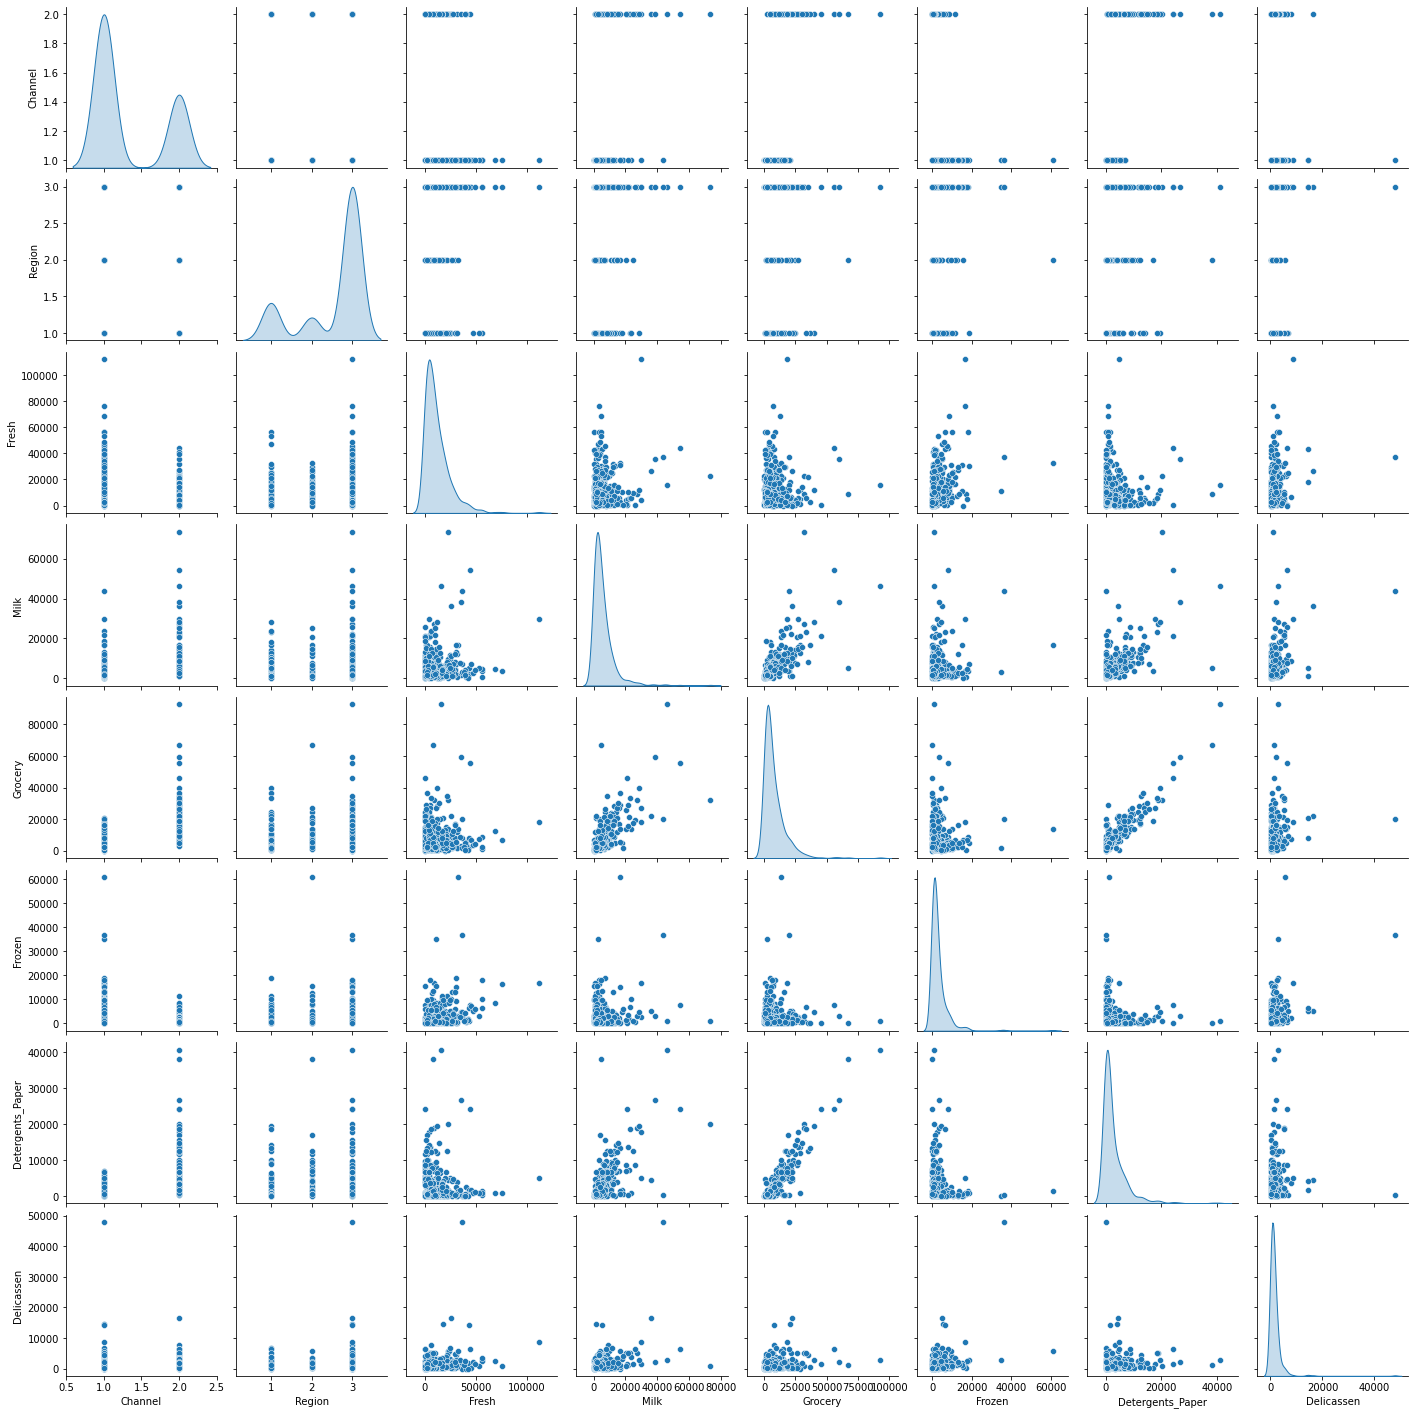

In [92]:

# Plot the pairwise relationships between the variables
sns.pairplot(wholesale, diag_kind='kde')

# Display the chart
plt.show()

### Understand differences in variables

Now, you will analyze the averages and standard deviations of each variable by plotting them in a barplot. This is a complementary step to the one before, as you will visually explore the differences in variable scales and variances.

The pandas library is loaded as pd and matplotlib.pyplot as plt. Also, the wholesale dataset has been loaded as a pandas DataFrame, while the averages and standard deviations for each column of the wholesale dataset are loaded as pandas Series named averages and std_devs respectively. Make sure you explore them in the console.

In [99]:
averages = wholesale.agg('mean')
std_devs = wholesale.agg('std')

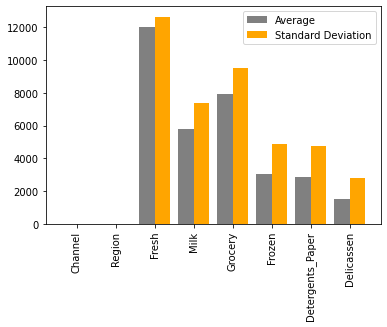

In [101]:
# Create column names list and same length integer list
x_names = wholesale.columns
x_ix = np.arange(wholesale.shape[1])

# Plot the averages data in gray and standard deviations in orange 
plt.bar(x=x_ix-0.2, height=averages, color='grey', label='Average', width=0.4)
plt.bar(x=x_ix+0.2, height=std_devs, color='orange', label='Standard Deviation', width=0.4)

# Add x-axis labels and rotate
plt.xticks(ticks=x_ix, labels=x_names, rotation=90)

# Add the legend and display the chart
plt.legend()
plt.show()

### Unskew the variables

You will now transform the wholesale columns using Box-Cox transformation, and then explore the pairwise relationships plot to make sure the skewness of the distributions has been reduced to make them more normal. This is a critical step to make sure the K-means algorithm converges and discovers homogeneous groups (a.k.a. clusters or segments) of observations.

The stats module is loaded from the scipy library, and the wholesale dataset has been imported as a pandas DataFrame.

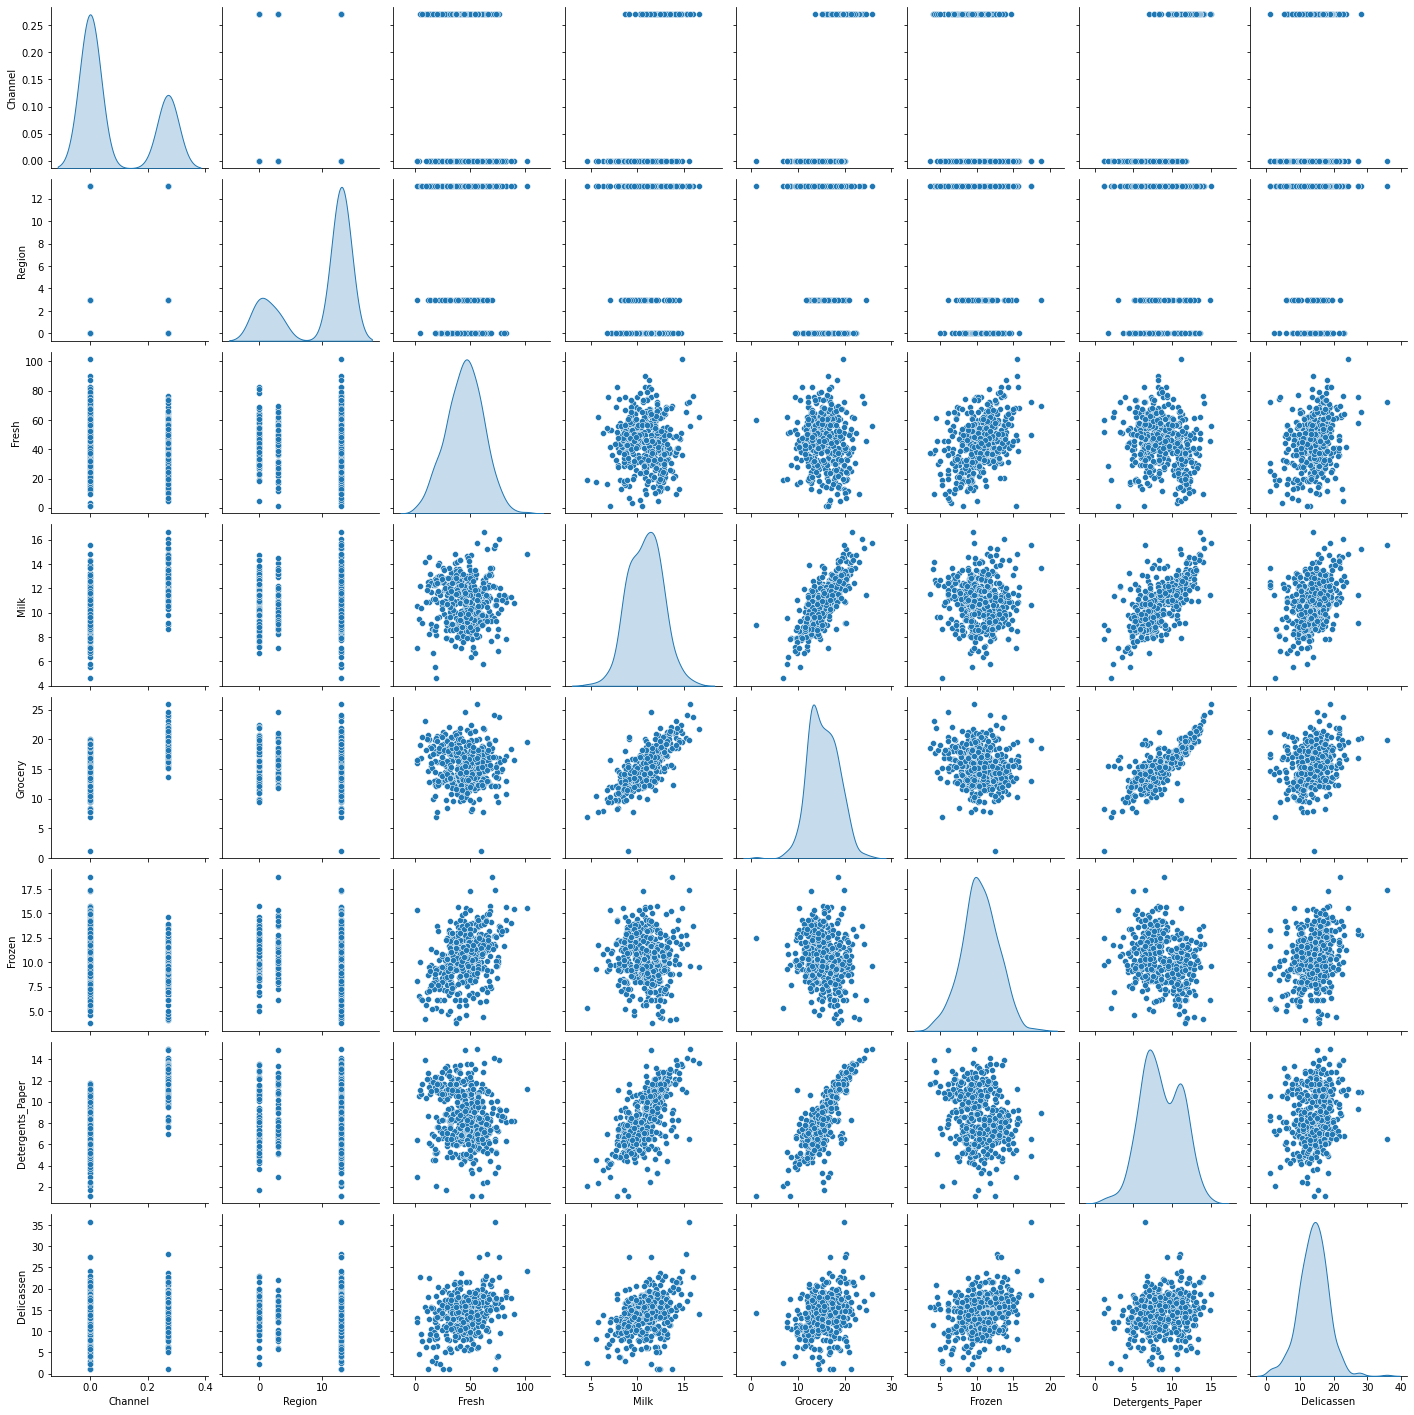

In [102]:
from scipy import stats

# Define custom Box Cox transformation function
def boxcox_df(x):
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox

# Apply the function to the `wholesale` dataset
wholesale_boxcox = wholesale.apply(boxcox_df, axis=0)

# Plot the pairwise relationships between the transformed variables 
sns.pairplot(wholesale_boxcox, diag_kind='kde')

# Display the chart
plt.show()

### Normalize the variables

Now, for the last step in data preparation. You will transform the unskewed dataset wholesale_boxcox to the same scale, meaning all columns have a mean of zero, and standard deviation of 1. You will use the StandardScaler function from the sklearn.preprocessing module.

The unskewed wholesale_coxbox dataset you have transformed in the previous exercise has been imported as a pandas DataFrame. Also, the StandardScaler() instance has been initialized as scaler.

In [105]:
scaler = StandardScaler()

# Fit the initialized `scaler` instance on the Box-Cox transformed dataset
scaler.fit(wholesale_boxcox)

# Transform and store the scaled dataset as `wholesale_scaled`
wholesale_scaled = scaler.transform(wholesale_boxcox)

# Create a `pandas` DataFrame from the scaled dataset
wholesale_scaled_df = pd.DataFrame(data=wholesale_scaled,
                                       index=wholesale_boxcox.index,
                                       columns=wholesale_boxcox.columns)

# Print the mean and standard deviation for all columns
wholesale_scaled_df.agg(['mean','std']).round()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Determine the optimal number of clusters

Here, you will use the elbow criterion method to identify the optimal number of clusters where the squared sum of error decrease becomes marginal. This is an important step to get a mathematical ball-park number of clusters to start testing. You will iterate through multiple k number of clusters and run a KMeans algorithm for each, then plot the errors against each k to identify the "elbow" where the decrease in errors slows downs.

The KMeans module is loaded from sklearn.cluster, the seaborn library is loaded as sns, and the matplotlib.pyplot module is loaded as plt. Also, the scaled dataset is loaded as wholesale_scaled_df as a pandas DataFrame.

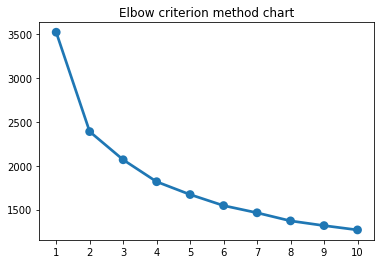

In [108]:
from sklearn.cluster import KMeans

# Create empty sse dictionary
sse = {}

# Fit KMeans algorithm on k values between 1 and 11
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(wholesale_scaled_df)
    sse[k] = kmeans.inertia_

# Add the title to the plot
plt.title('Elbow criterion method chart')

# Create and display a scatter plot
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Build segmentation with k-means clustering

In this exercise, you will build the customer segmentation with KMeans algorithm. As you've identified in the previous step, the mathematically optimal number of clusters is somewhere around 3 and 4. Here, you will build one with 4 segments.

The pre-processed dataset has been loaded as wholesale_scaled_df. You will use it to run the KMeans algorithm, and the raw un-processed dataset as wholesale - you will later use it to explore the average column values for the 4 segments you'll build.

In [109]:
# Import `KMeans` module
from sklearn.cluster import KMeans

# Initialize `KMeans` with 4 clusters
kmeans=KMeans(n_clusters=4, random_state=123)

# Fit the model on the pre-processed dataset
kmeans.fit(wholesale_scaled_df)

# Assign the generated labels to a new column
wholesale_kmeans4 = wholesale.assign(segment = kmeans.labels_)

In [111]:
# Print the header of the `wholesale_kmeans4` dataset
wholesale_kmeans4.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


### Alternative segmentation with NMF

In this exercise, you will analyze product purchase data and identify meaningful segments using non-negative matrix factorization algorithm (NMF). It works well with sparse customer by product matrices that are typical in the e-commerce or retail space. Finally, you will extract the components that you will then explore in the upcoming exercise.

We have loaded pandas as pd and numpy as np. Also, the raw customer by product purchase dataset has been loaded as wholesale.

In [112]:
# Import the non-negative matrix factorization module
from sklearn.decomposition import NMF

# Initialize NMF instance with 4 components
nmf = NMF(4)

# Fit the model on the wholesale sales data
nmf.fit(wholesale)

# Extract the components 
components = pd.DataFrame(data=nmf.components_, columns=wholesale.columns)

### K-means segmentation averages

In this exercise, you will explore the average column values for a 3-segment solution with K-means. As part of the test & learn exploration process, visually inspecting the segmentation solutions is critical to identify the most business relevant option.

The seaborn as sns, and matplotlib.pyplot as plt. Also, we have run a 3-segment solution with K-means and loaded the dataset with assigned segment labels as wholesale_kmeans3 DataFrame.

In [114]:
# Import `KMeans` module
from sklearn.cluster import KMeans

# Initialize `KMeans` with 4 clusters
kmeans=KMeans(n_clusters=3, random_state=123)

# Fit the model on the pre-processed dataset
kmeans.fit(wholesale_scaled_df)

# Assign the generated labels to a new column
wholesale_kmeans3 = wholesale.assign(segment = kmeans.labels_)

         Channel  Region    Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
segment                                                                         
0            1.0     3.0   8765.0   2280.0   2898.0  2080.0             578.0   
1            1.0     2.0  23236.0   5412.0   5601.0  7221.0             907.0   
2            2.0     3.0   8192.0  10882.0  16576.0  1388.0            7475.0   

         Delicassen  
segment              
0             693.0  
1            2836.0  
2            1701.0  


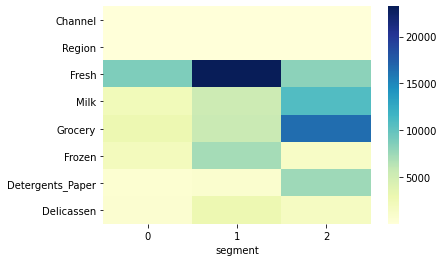

In [115]:
# Group by the segment label and calculate average column values
kmeans3_averages = wholesale_kmeans3.groupby(['segment']).mean().round(0)

# Print the average column values per each segment
print(kmeans3_averages)

# Create a heatmap on the average column values per each segment
sns.heatmap(kmeans3_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()

### NMF segmentation averages

Finally, you will visually explore the average values of the 3-segment solution built by NMF and can compare it to the K-means one. Here you will extract the features matrix W which we will use to extract the hard segment assignment by choosing the column value (segment) with highest associated value in this matrix for each customer.

We have loaded pandas library as pd and seaborn library as sns. The raw wholesale dataset has been imported, and the already fitted 3-segment NMF instance as nmf. The components dataset has been loaded as pandas DataFrame.

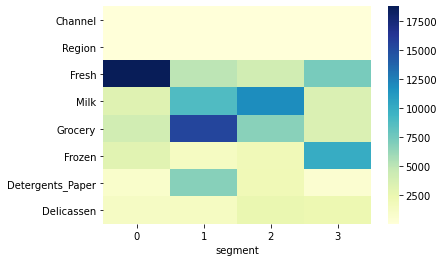

In [116]:
# Create the W matrix
W = pd.DataFrame(data=nmf.transform(wholesale), columns=components.index)
W.index = wholesale.index

# Assign the column name where the corresponding value is the largest
wholesale_nmf3 = wholesale.assign(segment = W.idxmax(axis=1))

# Calculate the average column values per each segment
nmf3_averages = wholesale_nmf3.groupby('segment').mean().round(0)

# Plot the average values as heatmap
sns.heatmap(nmf3_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()